# Taylor Method

This notebook illustrates the 3rd order Taylor method using the initial value problem
$$ y^{'}=t-y, \ \ (1 \leq t \leq 3) $$
with the initial condition
$$y(1)=\frac{2}{e}$$



### 3rd Order Taylor:
The general form of the 3rd order Taylor is:
$$ w_{i+1}=w_i+h(f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)+\frac{h^2}{6}f''(t_i,w_i))$$

## Read in Libraries 

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Setting up the discrete time axis
$$ h=\frac{t_{end}-t_{start}}{N} $$
$$ h=\frac{3-1}{10}=0.2 $$
$$t_i=t_0+ih$$
$$t_i=0+0.2i$$
for $i=0,1,2,...,5.$

Text(0.5,1,'Illustration of discrete time points for h=0.2')

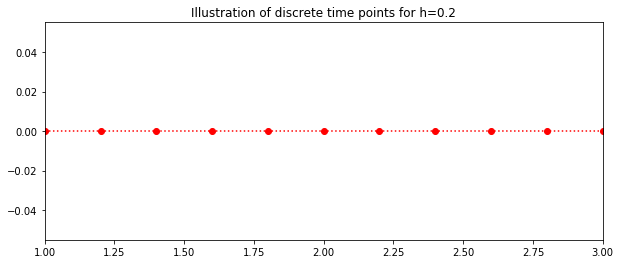

In [2]:
N=10
t_end=3.0
t_start=1.0
h=((t_end-t_start)/N)

IC=2/np.exp(1)
t=np.arange(t_start,t_end+h/2,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((1,3))
plt.title('Illustration of discrete time points for h=%s'%(h))

## Specific 3rd Order Taylor
To write the specific difference equation for the intial value problem we need derive $f$, $f'$ and $f''$.

$$f(t,y)=t-y$$


In [3]:
def myfun(t,w):
    ftw=t-w
    return ftw

$$f'(t,y)=1-y'=1-t+y$$

In [4]:
def myfund(t,w):
    ftw=1-t+w
    return ftw

$$f''(t,y)=-1+y'=-1+t-y$$

In [5]:
def myfundd(t,w):
    ftw=-1+t-w
    return ftw

### Specific Difference equation
This gives the difference equation
$$ w_{i+1}= w_{i} + h(t_i-w_i+\frac{h}{2}(1-t_i+w_i)+\frac{h^2}{6}(-1+t_i-w_i)) $$


## Method

In [6]:
Taylor=np.zeros(N+1)
Taylor[0]=IC
y=(2)*np.exp(-t)+t-1
for i in range (0,N):
    Taylor[i+1]=Taylor[i]+h*(myfun(t[i],Taylor[i])+h/2*myfund(t[i],Taylor[i])+h*h/6*myfundd(t[i],Taylor[i]))

## Results

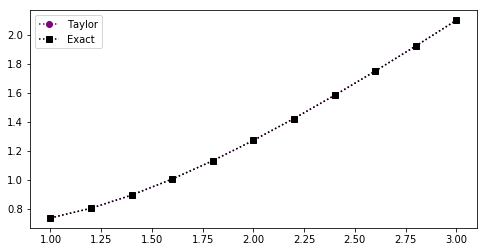

In [7]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,Taylor,'o:',color='purple',label='Taylor')
plt.plot(t,y,'s:',color='black',label='Exact')
plt.legend(loc='best')

## Table

In [9]:
table = ListTable()
table.append(['time', 'Taylor',  'Exact','Exact Error'])
for i in range (0,N+1):
    table.append([round(t[i],3),  round(Taylor[i],3), round(y[i],3),np.abs(round(y[i]-Taylor[i],5))])
    
table



time,Taylor,Exact,Exact Error
1.0,0.736,0.736,0.0
1.2,0.802,0.802,5e-05
1.4,0.893,0.893,8e-05
1.6,1.004,1.004,9e-05
1.8,1.13,1.131,0.0001
2.0,1.271,1.271,0.00011
2.2,1.422,1.422,0.0001
2.4,1.581,1.581,0.0001
2.6,1.748,1.749,9e-05
2.8,1.922,1.922,9e-05
